# **Objective-** Apply k-means++ and k-medoids clustering to Amazon food reviews dataset (Bag of words representation)

#### **About the dataset**
Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.

* Number of reviews: 568,454 
* Number of users: 256,059 
* Number of products: 74,258 
* Timespan: Oct 1999 - Oct 2012 
* Number of Attributes/Columns in data: 10

##### **Attribute Information**:

1. Id ProductId - unique identifier for the product 
2. UserId - unqiue identifier for the user ProfileName 
3. HelpfulnessNumerator - number of users who found the review helpful 
4. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not 
5. Score - rating between 1 and 5 
6. Time - timestamp for the review 
7. Summary - brief summary of the review 
8. Text - text of the review

#### **Codes for-**
* Apply k-means++ and k-medoids algo to bag of words featurization.
* Apply elbow method to plot loss vs k graph.

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [7]:
import warnings
warnings.filterwarnings('ignore')

## **Loading data**

In [8]:
#Loading the already prepared data
data=pd.read_csv('data.csv')
data.head(7)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_text
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh recit car dr...
1,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,b'rememb see show air televis year sister late...
2,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,b'beetlejuic well written movi everyth excel a...
3,212472,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",b'twist rumplestiskin captur star michael keat...
4,417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,b'beetlejuic excel funni keaton hilari wacki g...
5,212533,230348,B00004RYGX,A1048CYU0OV4O8,Judy L. Eans,2,2,1,947376000,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,b'one movi movi fill whatev els want call'
6,212458,230269,B00004RYGX,A1B2IZU1JLZA6,Wes,19,23,0,948240000,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very...",b'alway enjoy funni didnt hesit pick clamshel ...


In [9]:
#taking 100k points 
sample_data=data.sample(100000)
final_string=[]
for sentence in sample_data['Cleaned_text'].values:
    line=[]
    for word in sentence.split():
        if(word==sentence.split()[0]):
            word=word[2:]
        line.append(word)
    str1=" ".join(line)    
    final_string.append(str1)

## **2. Applying k-means clustering method to Bag of words representation**

In [6]:
count_vect=CountVectorizer()
train=count_vect.fit_transform(final_string)
train=normalize(train)

In [13]:
# code borrowed from http://www.awesomestats.in/python-cluster-validation/
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init=5 )
  clusters.fit( train )
  cluster_errors.append( clusters.inertia_ )

In [14]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [17]:
clusters_df[0:20]

,cluster_errors,num_clusters
0,95094.671785,1
1,93935.223928,2
2,92807.309443,3
3,91900.336850,4
4,91278.569749,5
5,90618.537076,6
6,90072.798001,7
7,89639.037562,8
8,89124.834763,9
9,88852.049255,10


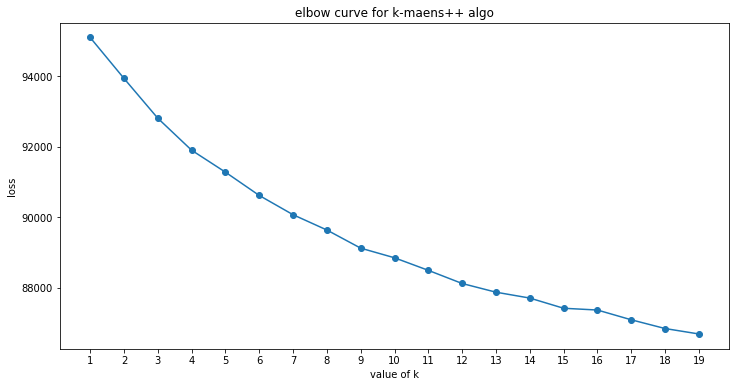

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot( list(range(1,20)), clusters_df.cluster_errors, marker = "o" )
plt.xticks(list(range(1,20)))
plt.title('elbow curve for k-maens++ algo')
plt.xlabel('value of k')
plt.ylabel('loss')
plt.show()

**Observation-** we can have optimal number of clusters = 19

In [35]:
sample_data['cluster_label']=clusters.labels_
sample_data.head(5)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_text,cluster_label
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh recit car dr...,0
1,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,b'rememb see show air televis year sister late...,7
2,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,b'beetlejuic well written movi everyth excel a...,0
3,212472,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",b'twist rumplestiskin captur star michael keat...,0
4,417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,b'beetlejuic excel funni keaton hilari wacki g...,8


In [51]:
label=sample_data.groupby(['cluster_label'])['cluster_label'].count()

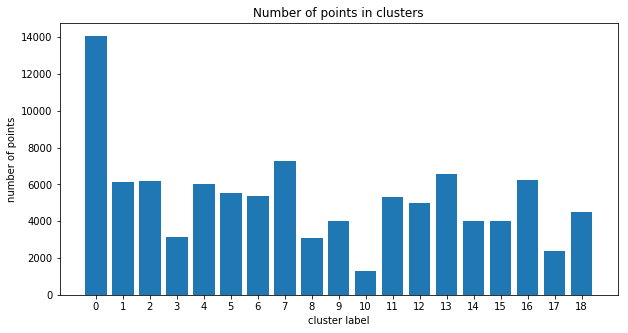

In [66]:
plt.figure(figsize=(10,5))
plt.bar(list(range(0,19)), label)
plt.xticks(list(range(0,19)))
plt.xlabel('cluster label')
plt.ylabel('number of points')
plt.title('Number of points in clusters')
plt.show()

In [104]:
#randomly select reviews from each cluster

import random

for i in range(19):
    id=list(sample_data['Id'][sample_data['cluster_label']==i])
    random_id=[]
    for j in range(5):
        number=random.choice(id)
        random_id.append(number)
        id.remove(number)
    print('selected random reviews from cluster label : ',i)
    print('*'*60)
    for j in random_id:
        print(sample_data[sample_data['Id']==j].iloc[0]['Text'])
        print('\n')
        
        

selected random reviews from cluster label :  0
************************************************************
I tried these chips looking for a healthy snack and they are quite tasty.  The packing/shipping however leaves a lot to be desired.  My box came completely smashed up and all the bags are crushed, with only about 1/4 of the chips in each bag actually intact. The rest are crumbs and dust.  VERY disappointed in the packaging.  There should be a box within a box and some type of protection..ie packing peanuts.


Sounds yummy, how could it not be with chocolate, but us food allergy folks need the ingredient list!!!!! chocolate often has soy lecithin in it and I don't want a six pack of something I can't eat!!! Please update your website to contain a list of ingredients on this product.


Some flavors are a bit tart, but overall are excellent, quick snack to take care of your sweet tooth and a healthier choice.


Have to admit I doctored the sauce a bit by adding Cruzan Coconut Rum (

#### **Observations-** 
1. Reviews in the clusters seems from same group like cluster-3 talks about dogs, cluster-6 talks about tea, so on.
2. We observed that a few reviews from a cluster don't match with other reviews of the same cluster, it maay be outliers.


## **3. Applying k-medoids clustering method to Bag of words representation**

In [5]:

from sklearn.metrics import pairwise_distances

In [4]:
#taking 25k points because with 50k points k-medoids function give memory error
sample_data=data.sample(25000)
final_string=[]
for sentence in sample_data['Cleaned_text'].values:
    line=[]
    for word in sentence.split():
        if(word==sentence.split()[0]):
            word=word[2:]
        line.append(word)
    str1=" ".join(line)    
    final_string.append(str1)

In [6]:
#bag of words representation
count_vect=CountVectorizer()
train=count_vect.fit_transform(final_string)
train=normalize(train)

In [7]:
#finding pairwise distances
D = pairwise_distances(train, metric='euclidean')
D.shape

(25000, 25000)

In [8]:
# For computing the loss.
def compute_loss(M, C, data): # Squared Loss. !!
    loss = 0.0
    for key, arr in C.items():
        for pos in arr:
            loss = loss + ((data[M[key]] - data[pos]).sum()) ** 2
    
    return loss

In [9]:
# code borrowed from https://raw.githubusercontent.com/letiantian/kmedoids/master/kmedoids.py
# this function finds clusters using k-medoids method 
# returns C : dictionary of all the reviews belonging to particular cluster label
# returns M : contains the index of central review of cluster
import numpy as np
import random

def kMedoid(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C

In [10]:

# Choosing the best cluster using Elbow Method.
cluster_range=list(range(2,20))
errors = []
for cluster in cluster_range:
    M, C = kMedoid(D, cluster) # Training Clustering.
    errors.append(compute_loss(M, C, train))
    #print(cluster)

In [11]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": errors } )

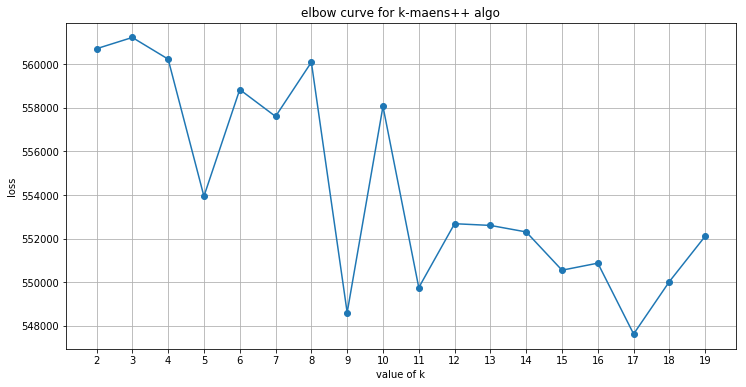

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot( list(range(2,20)), clusters_df.cluster_errors, marker = "o" )
plt.xticks(list(range(2,20)))
plt.title('elbow curve for k-maens++ algo')
plt.xlabel('value of k')
plt.ylabel('loss')
plt.grid()
plt.show()

**Observation-** we can have optimal number of clusters = 17

In [13]:
optimal_cluster = np.argmin(clusters_df.cluster_errors)+2
print('Optimal number of cluster = ',optimal_cluster)

Optimal number of cluster =  17


In [15]:
# k-medoids algo using the opotimal number of clusters
M, C = kMedoid(D, k = optimal_cluster) 

In [16]:
# finding the length of each clusters
cluster_label=[]
label_length=[]
for i in range(len(C)):
    label_length.append(len(C[i]))
    cluster_label.append(i)

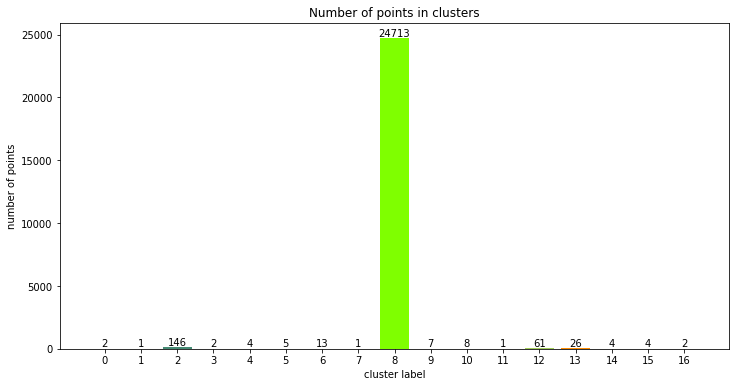

In [24]:
fig, ax = plt.subplots(figsize=(12,6))
mycolors = ['#FAEBD7', '#00FFFF', '#458B74', '#E3CF57', '#0000FF', '#A52A2A', '#8A360F', '#FF6103', '#7FFF00', '#CD5B45', '#CDC8B1', '#008B8B', '#A2CD5A', '#FF8C00', '#483D8B', '#FFD700', '#030303']
rects1 = ax.bar(cluster_label, label_length, color=mycolors)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects1)
plt.xticks(list(range(0,len(cluster_label))))
plt.xlabel('cluster label')
plt.ylabel('number of points')
plt.title('Number of points in clusters')
plt.show()

In [22]:
#randomly select reviews from each cluster

import random

for i in range(len(C)):
    id=list(C[i])
    random_id=[]
    if(len(C[i])<3):
        num=len(C[i])
    else:
        num=3
    for j in range(num):
        number=random.choice(id)
        random_id.append(number)
        id.remove(number)
    print('selected random reviews from cluster label : ',i)
    print('*'*60)
    print('central review')
    print('-'*30)
    print(sample_data.iloc[M[i]]['Text'])
    print('-'*30)
    print('review belongs to cluster ',i)
    print('-'*30)
    for j in random_id:
        print(sample_data.iloc[j]['Text'])
        print('\n')
        
        

selected random reviews from cluster label :  0
************************************************************
central review
------------------------------
I bought a lot of macadamia nuts from many different sellers before and was very disappointed until this one. The quality of this nut is superior. There is no broken nut at all. They taste so fresh.  The best macadamia nuts I ever bought and the best price of all.  Thank you
------------------------------
review belongs to cluster  0
------------------------------
I bought a lot of macadamia nuts from many different sellers before and was very disappointed until this one. The quality of this nut is superior. There is no broken nut at all. They taste so fresh.  The best macadamia nuts I ever bought and the best price of all.  Thank you


After unable to find Macadamia nuts in a few of my local supermarkets, I decided to go on amazon to look for them. The price was fairly reasonable, as it (macadamia was named as one of the most expens

#### **Observations-** 
1. K-medoids very better grouping these reviews in clusters.
2. Almost all the cluster's reviews have similarity with central reviews.


## **4. Conclusion--**
1. K-medoids seems better than k-meansfor this text data.
2. Finding the similarity in k-medoids cluster's reviews is very easy. They contain some sort of similar objects and having similar meaning.
